In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

dataset = pd.read_csv('datasets/play_football.csv', sep = ",")

label = LabelEncoder()
dataset = dataset.apply(label.fit_transform)

dataset.columns = pd.read_csv('datasets/play_football.csv', sep = ",").columns

X = dataset.drop('Play', axis = 1)
Y = dataset['Play']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 111)
model = SVC(kernel = 'linear', C = 0.1)
model.fit(X_train, Y_train)
print(model.score(X_test, Y_test))

0.811111111111


In [2]:
# Attributes
model.intercept_, model.coef_

(array([ 0.99940614]),
 array([[ -9.99662379e-01,   3.04206374e-04,   1.99962896e+00,
          -5.25163930e-04]]))

### Visualizzazione

0.678571428571


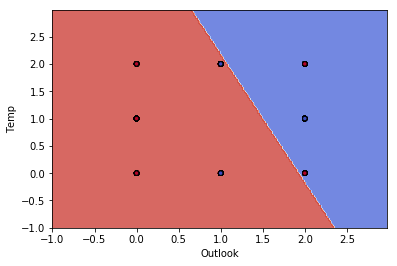

In [3]:
X_view = X.copy()
X_view = X_view.values[:, :2]
X0, X1 = X_view[:, 0], X_view[:, 1]

model.fit(X_view, Y)
print(model.score(X_view, Y))


# Plot
x_min, x_max = X0.min() - 1, X0.max() + 1
y_min, y_max = X1.min() - 1, X1.max() + 1
h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
out = plt.contourf(xx, yy, Z, cmap = plt.cm.coolwarm, alpha = 0.8)

plt.scatter(X0, X1, c = Y, cmap = plt.cm.coolwarm, s = 20, edgecolors = 'k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Outlook')
plt.ylabel('Temp')
plt.show()